<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2020/2 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/14.00-Qualidade_do_modelo.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2020p2%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/14.00-Qualidade_do_modelo.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/slides/14.00-Qualidade_do_modelo.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 13. Propagação de incertezas](13.00-Propagacao_incertezas.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [15. Validação de modelos ->](15.00-Validacao_do_modelo.ipynb)

---


# Qualidade do ajuste

- Erros absolutos SS e RMS
- Erros relativos baseados em SS e RMS
- R-quadrado
- R-quadrado ajustado

In [1]:
using Random
using Statistics
using LinearAlgebra
using Plots
theme(:ggplot2)

## Amostra e modelo

Consideramos 

- Uma **amostra** $ (x_i, y_i), i=1, \ldots, N$. 

- Um **modelo** $y = f_\beta(x),$ com **parâmetros** $\beta=(\beta_1, \ldots, \beta_m)$.

- **Valores calculados pelo modelo:** $\hat y_i = f_\beta(x_i).$

- **Dados modelados:** $ (x_i, \hat y_i), i = 1, \ldots, N.$

## Resíduos

Os resíduos são dados pelas diferenças entre os dados da amostra e os do modelo:

$$ r_i = f_\beta(x_i) - y_i.
$$

ou, com a notação $\hat y_i = f(x_i)$,

$$ r_i = \hat y_i - y_i.
$$

## Erros absolutos SS e RMS

Duas maneiras naturais, e relacionadas, de calcular o erro de um modelo são:

- **SS dos resíduos** ou **soma dos quadrados dos resíduos** (sum of squares of residuals):

$$ \mathrm{SS}(\mathbf{r}) = \sum_{i=1}^N r_i^2 = \sum_i (\hat y_i - y_i)^2.
$$

- **RMS dos resíduos**  ou **raiz quadrada da média dos quadrados dos resíduos** (root-mean-square of the residuals):

$$ \mathrm{RMS}(\mathbf{r}) = \sqrt{\frac{1}{N} \sum_{i=1}^N r_i^2} = \sqrt{\frac{1}{N} \sum_{i=1}^N(\hat y_i - y_i)^2}.
$$

**Observações:**

* Estes são erros **absolutos** do modelo.

* $\mathrm{SS}(\mathbf{r})$ depende "fortemente" do número de dados e pode crescer significativamente à medida em que os dados aumentam em número.

* Temos 

$$  \mathrm{RMS}(\mathbf{r}) = \sqrt{\frac{\mathrm{SS(\mathbf{r})}}{N}}.
$$

* $\mathrm{RMS}(\mathbf{r})$ tem a mesma grandeza que $y_i$.

## Erros relativos

Erros relativos podem ser obtidos dividindo os erros absolutos por alguma quantidade de mesma grandeza dos dados. No caso, podemos considerar

- **SS relativo:**

$$ \mathrm{SS}_\textrm{rel} = \frac{\mathrm{SS}(\mathbf{r})}{\mathrm{SS}(\mathbf{y})},
$$

onde $\mathrm{SS}(\mathbf{y}) = \sum_i y_i^2$.

- **RMS relativo dos resíduos**:

$$ \mathrm{RMS}_\textrm{rel} = \frac{\mathrm{RMS}(\mathbf{r})}{\mathrm{RMS}(\mathbf{y})},
$$

onde $\mathrm{RMS}(\mathbf{y}) = \sqrt{(1/N)\sum_i y_i^2}$.

**Observações:**

- É claro que os denominadores não podem se anular, mas eles so se anulam quando todos $y_i=0$, sendo que, nesse caso, não há muito o que modelar.

- $\mathrm{SS}_\textrm{rel}$ não depende "tão fortemente" do número de amostras. 

- A relação entre $\mathrm{SS}_\textrm{rel}$ e  $\mathrm{RMS}_\textrm{rel}$ não depende explicitamente do número de amostras:

$$ \mathrm{SS}_\textrm{rel} = \mathrm{RMS}_\textrm{rel}^2.
$$

- Como $\mathrm{RMS}$ tem a mesma grandeza que os valores (e.g. comprimento, velocidade, massa, população, moeda), então $\mathrm{RMS}_{\text{rel}}$ é mais natural para expressar o erro relativo.

- Por exemplo, se $\mathrm{RMS}_\textrm{rel} \approx 0.1$, podemos dizer que o modelo nos dá uma aproximação de 10% dos dados da amostra.

## R-quadrado

Uma outra quantidade relativa usada para medir a qualidade de um modelo é o chamado **R quadrado**, ou $R^2$, baseado diretamente na soma dos quadrados dos resíduos $\mathrm{SS}(r_i)$. Considera-se

- A **média dos valores dos dados** da amostra:

$$ \bar y = \frac{1}{N} \sum_{i=1}^N y_i.
$$

- **Soma dos quadrados total** (que é proporcional à variância total):

$$ \mathrm{SS}_\text{tot} = \sum_{i=1}^N (y_i - \bar y)^2 = N \mathrm{Var}(y_i).
$$

- **Soma dos quadrado da regressão:**

$$ \mathrm{SS}_\text{reg} = \sum_{i=1}^N (\hat y_i - \bar y)^2.
$$

- **R-quadrado:**

$$ R^2 = \frac{\mathrm{SS}_\text{reg}}{\mathrm{SS}_\text{tot}}.
$$

## R-quadrado em regressão via mínimos quadrados

Quando a modelagem é feita via mínimos quadrados, vale a relação

$$ \mathrm{SS}_\text{reg} = \mathrm{SS}_\text{tot} - \mathrm{SS}_\text{res},
$$

o que nos leva à formula

$$ R^2 = 1 - \frac{\mathrm{SS}_\text{res}}{\mathrm{SS}_\text{tot}},
$$

onde $\mathrm{SS}_\text{res} = \mathrm{SS}(\mathbf{r})$.

## Comparando diferentes modelos

- Uma primeira medida de comparação entre diferentes modelos é comparar os valores correspondentes de algumas das quantidade vistas acima:

    - RMS absoluto
    
    - RMS relativo
    
    - SS relativo
    
    - R-quadrado
    
- A medida SS absoluta não é apropriada porque depende fortemente do número de dados.

- A dependência dessas medidas em relação ao número de parâmetros também é um ponto delicado.

## R-quadrado ajustado

- Para compensar um pouco a influência do número de parâmetros, um $R^2$ ajustado é usado.

- Temos, mais precisaement, o seguinte ajuste em relação ao número de parâmetros do modelo:

$$ \bar R^2 = 1 - (1-R^2)\frac{N-1}{N-k},
$$

onde $N$ é o número de dados e $k$ é o número de parâmetros.

## Exemplo sintético

Neste exemplo sintético, vamos 

- Construir dados sintéticos a partir de perturbações aleatórias em torno de uma determinada função.

- Perturbações uniformemente distribuídas entre $\pm 0.3$ na abscissa.

- Perturbações uniformemente distribuídas entre $\pm 1$ na ordenada.

- Em seguida, usaremos mínimos quadrados para ajustar um polinômio de grau três.

- Posteriormente, mínimos quadrados para ajustar polinômios de diversos graus.

In [2]:
# f = β₀ + β₁x + β₂x² + … + βᵢxⁱ
f_modelo(x, β) = β ⋅ [x^j for j in 0:length(β)-1]

f_modelo (generic function with 1 method)

In [3]:
f_dados(x,β) = exp(β[4]*x) * (β[1] + β[2]*x + β[3]*x^2 + β[4]*x^3)

f_dados (generic function with 1 method)

In [4]:
β̲ = [5.2, 0.5, -0.45, 0.05]
x = -1.0:0.1:8.0
nothing

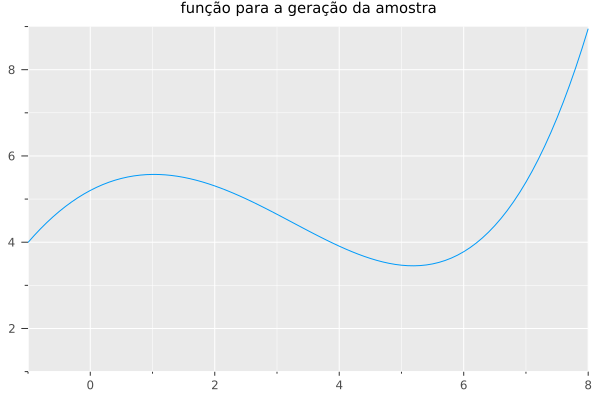

In [5]:
plot(x, x->f_dados(x,β̲), label=nothing, xlim=(-1,8), ylim=(1,9), legend=false,
    titlefont=10, title="função para a geração da amostra")

# Gerando os dados sintéticos

In [6]:
dados_x = collect(0.0:8.0) .+ 0.3 * randn(MersenneTwister(14003), 9)
dados_y = f_dados.(dados_x, Ref(β̲)) .+ randn(MersenneTwister(14004), 9)
nothing

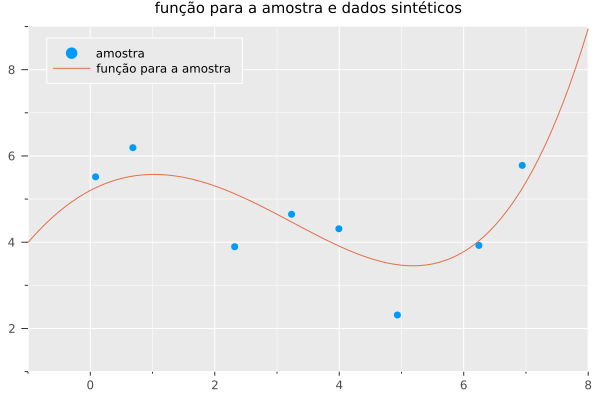

In [7]:
plot(xlim=(-1,8), ylim=(1,9), legend=:topleft,
    titlefont=10, title="função para a amostra e dados sintéticos")
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
plot!(x, x->f_dados(x,β̲), label="função para a amostra")

## Regressão linear via mínimos quadrados

In [8]:
A = [ones(length(dados_x)) dados_x dados_x.^2 dados_x.^3]

9×4 Matrix{Float64}:
 1.0  0.0851634   0.0072528    0.000617673
 1.0  0.684559    0.468621     0.320799
 1.0  2.31975     5.38123     12.4831
 1.0  3.23412    10.4595      33.8274
 1.0  3.99424    15.954       63.724
 1.0  4.93406    24.345      120.12
 1.0  6.2438     38.985      243.415
 1.0  6.9403     48.1677     334.298
 1.0  7.98801    63.8083     509.701

In [9]:
β̂ = A \ dados_y

4-element Vector{Float64}:
  5.58285349098757
  0.7068669251980298
 -0.5942506978954095
  0.07079991932172676

## Resultado

In [10]:
function info_ajuste(dados_x, dados_y, model_y, k)
    N = length(dados_x)
    y_mean = mean(dados_y)
    residuos = model_y - dados_y
    ss = norm(residuos)^2
    rms = sqrt(ss/N)
    ss_y = norm(dados_y)^ 2
    rms_y = sqrt(ss_y/N)

    ss_rel = ss/ss_y
    rms_rel = sqrt(ss_rel)
    ss_tot = N*var(dados_y)
    ss_reg = norm(model_y .- y_mean)^2
    r_sq = ss_reg/ss_tot
    r_sq_aj = 1 - (1 - r_sq)*(N-1)/(N-k)
    
    return (
        residuos=residuos, rms=rms, rms_rel=rms_rel, ss=ss, ss_rel=ss_rel,
        r_sq=r_sq, r_sq_aj=r_sq_aj
    )
end

info_ajuste (generic function with 1 method)

In [11]:
info = info_ajuste(dados_x, dados_y, f_modelo.(dados_x,Ref(β̂)), length(β̂))

println("RMS dos resíduos: $(info.rms)")
println("RMS relativo: $(info.rms_rel)")
println("Baseado no RMS relativo, o modelo nos dá uma aproximação de $(100*info.rms_rel)% dos dados")
println("SS dos resíduos: $(info.ss)")
println("SS relativo: $(info.ss_rel)}")
println("R-quadrado: $(info.r_sq)")
println("R-quadrado ajustado: $(info.r_sq_aj)")

RMS dos resíduos: 0.5796526627862785
RMS relativo: 0.10662332249595524
Baseado no RMS relativo, o modelo nos dá uma aproximação de 10.662332249595524% dos dados
SS dos resíduos: 3.023974885277007
SS relativo: 0.011368532900076474}
R-quadrado: 0.803366892196622
R-quadrado ajustado: 0.6853870275145952


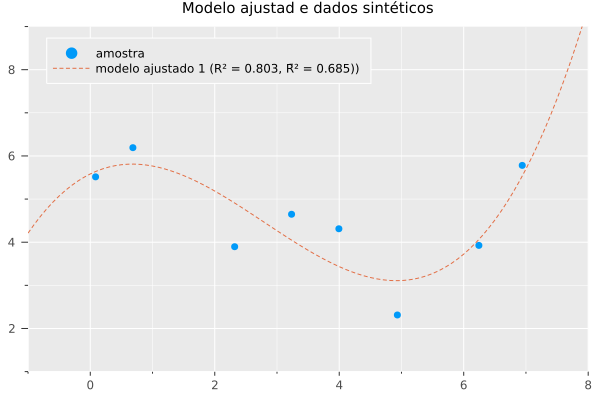

In [12]:
plot(titlefont=10, title="Modelo ajustad e dados sintéticos", legend=:topleft,
    xlim=(-1,8), ylim=(1,9))
plot!(dados_x, dados_y, seriestype=:scatter, label="amostra")
plot!(x,x->f_modelo(x,β̂), label="modelo ajustado 1 (R² = $(round(info.r_sq,digits=3)), R̄² = $(round(info.r_sq_aj,digits=3))))",
    linestyle=:dash)

## Aumentando o número de dados

In [13]:
dados_novos_x = collect(0.5:8.5) .+ 0.3 * randn(MersenneTwister(14005), 9)
dados_novos_y = f_dados.(dados_x, Ref(β̲)) .+ randn(MersenneTwister(14006), 9)
dados2_x = reshape([dados_x'; dados_novos_x'],:,1)
dados2_y = reshape([dados_y'; dados_novos_y'],:,1)
nothing

In [14]:
A2 = [ones(length(dados2_x)) dados2_x dados2_x.^2 dados2_x.^3]
β̂2 = A2 \ dados2_y

4×1 Matrix{Float64}:
  5.827742779013713
  0.1531179310864539
 -0.35223469770266735
  0.045153330709905466

## Dados da análise

In [15]:
info2 = info_ajuste(dados2_x, dados2_y, f_modelo.(dados2_x,Ref(β̂2)), length(β̂2))

println("RMS dos resíduos: $(info2.rms)")
println("RMS relativo: $(info2.rms_rel)")
println("Baseado no RMS relativo, o modelo nos dá uma aproximação de $(100*info2.rms_rel)% dos dados")
println("SS dos resíduos: $(info2.ss)")
println("SS relativo: $(info2.ss_rel)}")
println("R-quadrado: $(info2.r_sq)")
println("R-quadrado ajustado: $(info2.r_sq_aj)")

RMS dos resíduos: 0.8522086357821341
RMS relativo: 0.15933461153108783
Baseado no RMS relativo, o modelo nos dá uma aproximação de 15.933461153108782% dos dados
SS dos resíduos: 13.072672060229632
SS relativo: 0.02538751843176267}
R-quadrado: 0.7237391241568885
R-quadrado ajustado: 0.6645403650476502


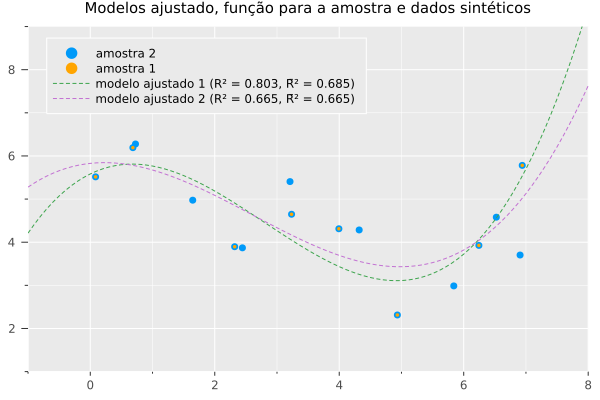

In [16]:
plot(titlefont=10, title="Modelos ajustado, função para a amostra e dados sintéticos", 
    xlim=(-1,8), ylim=(1,9), legend=:topleft)
plot!(dados2_x, dados2_y, seriestype=:scatter, label="amostra 2")
plot!(dados_x, dados_y, markersize=2, seriestype=:scatter, label="amostra 1", color=:orange)
plot!(x,x->f_modelo(x,β̂), label="modelo ajustado 1 (R² = $(round(info.r_sq,digits=3)), R̄² = $(round(info.r_sq_aj,digits=3)))", linestyle=:dash)
plot!(x,x->f_modelo(x,β̂2), label="modelo ajustado 2 (R² = $(round(info2.r_sq_aj,digits=3)), R̄² = $(round(info2.r_sq_aj,digits=3)))", linestyle=:dash)

## Ajuste com polinômios de grau mais alto

In [17]:
A3 = hcat([dados_x.^j for j=0:8]...)

9×9 Matrix{Float64}:
 1.0  0.0851634   0.0072528  …       3.24915e-8      2.76709e-9
 1.0  0.684559    0.468621           0.0704495       0.0482268
 1.0  2.31975     5.38123          361.481         838.544
 1.0  3.23412    10.4595          3700.78        11968.8
 1.0  3.99424    15.954          16219.6         64785.0
 1.0  4.93406    24.345      …   71192.4             3.51268e5
 1.0  6.2438     38.985         369950.0             2.30989e6
 1.0  6.9403     48.1677             7.75614e5       5.38299e6
 1.0  7.98801    63.8083             2.07525e6       1.65771e7

In [18]:
β̂3 = A3 \ dados_y

9-element Vector{Float64}:
   5.48008936808581
  -0.1319319380788815
   7.443460411335618
 -12.974325526326671
   8.31950980805813
  -2.6137483089635136
   0.43201963125058374
  -0.036062570034175144
   0.0011992199319383861

In [19]:
info3 = info_ajuste(dados_x, dados_y, f_modelo.(dados_x, Ref(β̂3)), length(β̂3))

println("RMS dos resíduos: $(info3.rms)")
println("RMS relativo: $(info3.rms_rel)")
println("Baseado no RMS relativo, o modelo nos dá uma aproximação de $(100*info3.rms_rel)% dos dados")
println("SS dos resíduos: $(info3.ss)")
println("SS relativo: $(info3.ss_rel)}")
println("R-quadrado: $(info3.r_sq)")
println("R-quadrado ajustado: $(info3.r_sq_aj)")

RMS dos resíduos: 6.1217051566280466e-12
RMS relativo: 1.1260476920830864e-12
Baseado no RMS relativo, o modelo nos dá uma aproximação de 1.1260476920830863e-10% dos dados
SS dos resíduos: 3.372774662221777e-22
SS relativo: 1.2679834048456453e-24}
R-quadrado: 0.8888888888891286
R-quadrado ajustado: -Inf


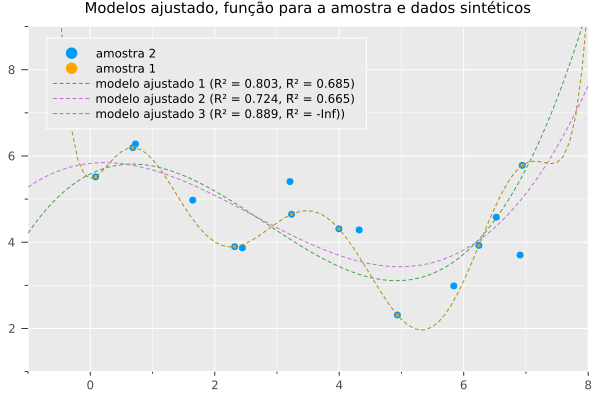

In [20]:
plot(titlefont=10, title="Modelos ajustado, função para a amostra e dados sintéticos", legend=:topleft,
    xlim=(-1,8), ylim=(1,9))
plot!(dados2_x, dados2_y, seriestype=:scatter, label="amostra 2")
plot!(dados_x, dados_y, markersize=2, seriestype=:scatter, label="amostra 1", color=:orange)
plot!(x,x->f_modelo(x,β̂), label="modelo ajustado 1 (R² = $(round(info.r_sq,digits=3)), R̄² = $(round(info.r_sq_aj,digits=3)))", linestyle=:dash)
plot!(x,x->f_modelo(x,β̂2), label="modelo ajustado 2 (R² = $(round(info2.r_sq,digits=3)), R̄² = $(round(info2.r_sq_aj,digits=3)))", linestyle=:dash)
plot!(x,x->f_modelo(x,β̂3), label="modelo ajustado 3 (R² = $(round(info3.r_sq,digits=3)), R̄² = $(round(info3.r_sq_aj,digits=3))))", linestyle=:dash)

<!--NAVIGATOR-->

---
[<- 13. Propagação de incertezas](13.00-Propagacao_incertezas.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [15. Validação de modelos ->](15.00-Validacao_do_modelo.ipynb)